# Analysis -  Mouse Gastrulation - Pseudotime #
#### stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
#### celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
####                    'Haematoendothelial progenitors','Blood progenitors 1'}
#### Using all 2000 genes to plot cell velocity

In [1]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os
from velocity_plot import *

# Load Data

In [2]:
not_combined_detail=False

if not_combined_detail:
    # load raw
    raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
    load_raw_data = pd.read_csv(raw_data_path)

    # combine detail
    detail_result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth'
    path_name_after_no='_all_geneepoch200check_n10Lr0.001C2cf0.3Downneighbors0_200_200Ratio0.125N30OAdamtraceR0.0corrcoefR0.0nD30autoDTrueautoNTruecostTsmoothavgCWin10p3smoW0.1binTrue/detail_e200.csv'
    load_cellDancer=pd.DataFrame()
    for i in range(1,11):
        detail_path=os.path.join(detail_result_path,(str(i)+path_name_after_no))
        detail=pd.read_csv(detail_path)

        detail.rename(columns = {'Unnamed: 0':'cellIndex'}, inplace = True) # for the optimize of data_reshape
        detail = detail.sort_values(by = ['gene_name', 'cellIndex'], ascending = [True, True]) # for the optimize of data_reshape

        load_cellDancer=load_cellDancer.append(detail)
    load_cellDancer=load_cellDancer.reset_index(drop=True)
    load_cellDancer_bkup=load_cellDancer.copy()
    
    
    load_cellDancer['clusters']=load_raw_data['clusters']
    load_cellDancer['cellID']=load_raw_data['cellID']
    load_cellDancer['embedding1']=load_raw_data['embedding1']
    load_cellDancer['embedding2']=load_raw_data['embedding2']
    load_cellDancer
    load_cellDancer.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv',index=False)

else:
    load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv')
# define output path
#output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/cell_velocity'

In [3]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880


       Unnamed: 0  pseudotime
0               0    0.571127
1               1    0.544858
2               2    0.552850
3               3    0.738510
4               4    0.682099
...           ...         ...
12324       12324    0.928007
12325       12325    0.959906
12326       12326    0.940040
12327       12327    0.943352
12328       12328    0.912390

[12329 rows x 2 columns]


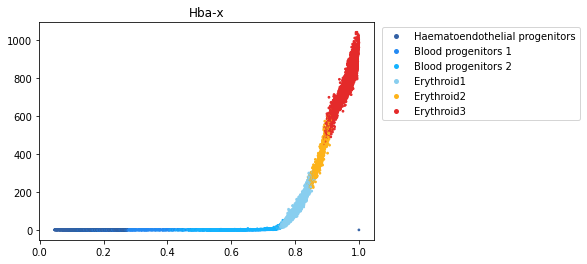

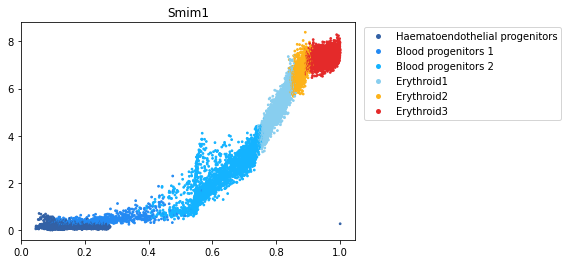

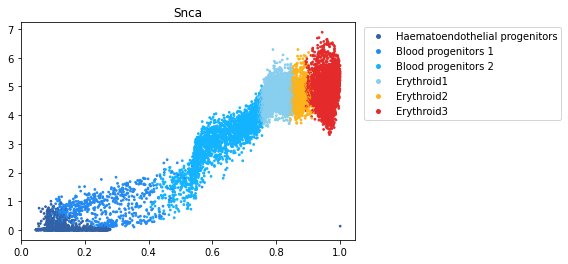

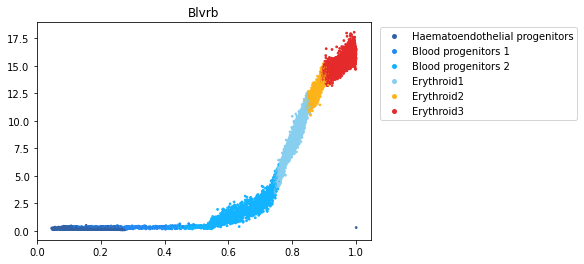

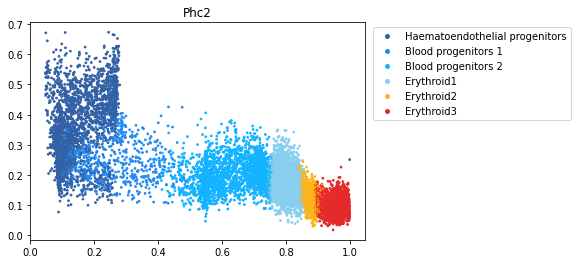

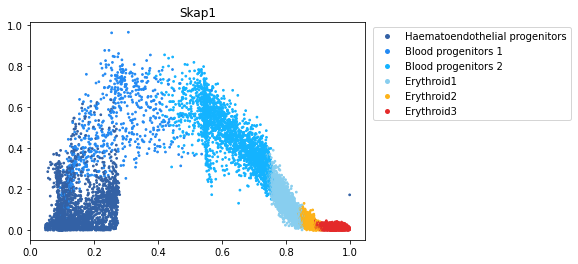

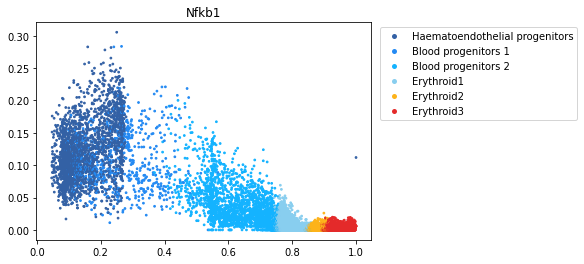

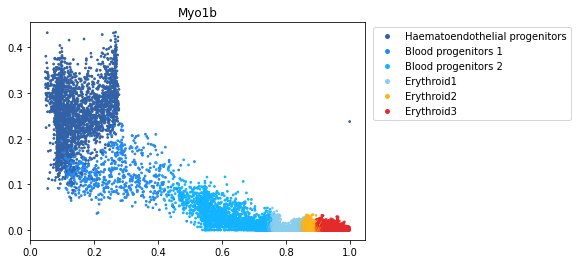

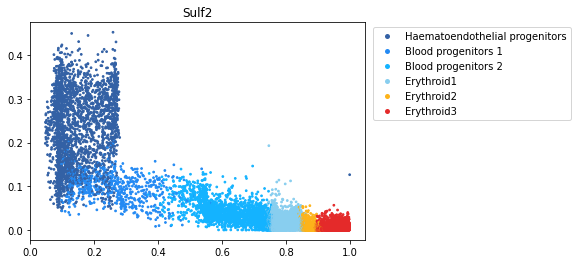

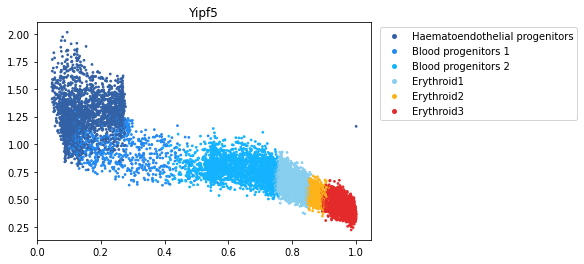

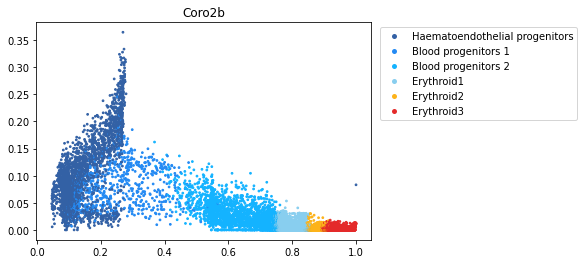

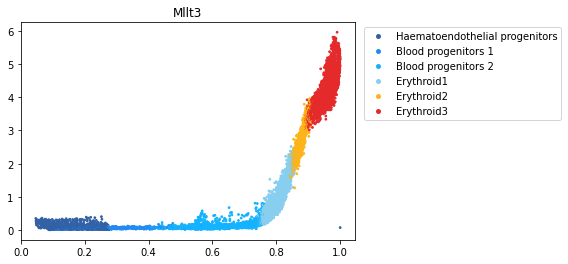

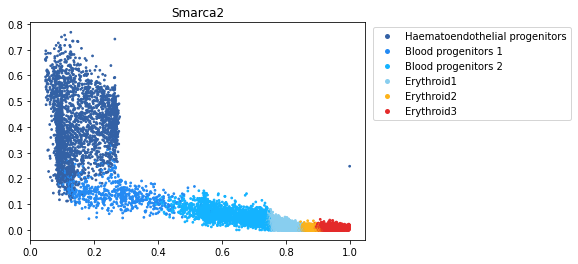

In [4]:
# radis 1

gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
#gene_list=['Hba-x']

save_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/gene_pseudotime/'
save_path=None

cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/pseudo_time_Gastrulation_combined_NN_radius1_smooth_pz.csv')
print(cell_time)

gene_list_pseudotime(gene_list,load_cellDancer,cell_time,colors=colormap_erythroid,save_path=save_path)#change name

# All cell cluster bar

index,3592,3442,5365,1466,5435,5708,5271,8794,1942,5257,...,3930,11886,7982,11435,11122,3784,11473,11604,12093,6844
clusters,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,0


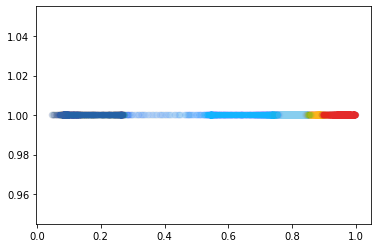

In [5]:
# radis 1, heatmap
onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
cell_time_time_sort=cell_time.sort_values('pseudotime')
cell_time_time_sort.columns=['index','pseudotime']
merged=pd.merge(cell_time_time_sort,onegene,left_on='index', right_on='cellIndex') # TODO: NOT cellIndex in the future

ids = {
'Haematoendothelial progenitors':0,
'Blood progenitors 1':1,
'Blood progenitors 2':2,
'Erythroid1':3,
'Erythroid2':4,
'Erythroid3':5}


plt.scatter(merged.pseudotime,[1]*len(merged.pseudotime),c=merged.clusters.map(colormap_erythroid),alpha=0.01)
cluster_time_sort=pd.DataFrame(merged.clusters.map(ids))

cluster_time_sort.index=merged['index']
#cluster_time_sort.T.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/cluster_time_sort.csv')
cluster_time_sort.T

# r-square calculation - bio meaning score

In [6]:
#### heatmap

# Non-para
# https://pythonhosted.org/PyQt-Fit/NonParam_tut.html
# https://towardsdatascience.com/time-series-clustering-deriving-trends-and-archetypes-from-sequential-data-bb87783312b4

## No Haematoendothelial progenitors

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kernel_regression import KernelReg
from utilities import get_gene_s0_by_time

In [8]:
cell_time=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/pseudo_time_Gastrulation_combined_NN_radius1_smooth_pz.csv')

s0_merged_part_gene,s0_merged_part_time=get_gene_s0_by_time(cell_time,load_cellDancer)

In [9]:
s0_merged_part_gene

,0610010F05Rik,1110038B12Rik,1500009L16Rik,1700017B05Rik,1700027J19Rik,1700037H04Rik,1810022K09Rik,1810026B05Rik,1810032O08Rik,2410003L11Rik,...,Zfpm1,Zmynd19,Zmynd8,Znrf1,Znrf3,Zrsr2,Zscan21,Zscan26,Zswim6,Zswim7
0,0.045757,0.755265,0.517064,0.227438,0.922967,0.382281,1.364491,0.187510,0.236766,0.009605,...,0.148109,0.694457,0.349836,0.704492,0.020616,1.399704,0.503637,0.056519,0.069720,0.368633
1,0.080250,0.741811,0.688037,0.258093,0.855593,0.423024,1.368414,0.220291,0.226738,0.006524,...,0.157351,0.786802,0.298789,0.643703,0.014003,1.342300,0.469649,0.051361,0.068521,0.480809
2,0.115107,0.668775,0.593461,0.263938,0.728814,0.425875,1.518204,0.281582,0.266112,0.005795,...,0.110479,0.847195,0.270915,0.567095,0.051119,1.375632,0.376475,0.049075,0.062892,0.412221
3,0.137819,0.639425,0.589416,0.284990,0.774082,0.430224,1.360984,0.271929,0.251287,0.005996,...,0.132182,0.908192,0.273795,0.491161,0.060487,1.269846,0.433855,0.041823,0.066696,0.386500
4,0.116552,0.688695,0.543766,0.254887,0.828682,0.450768,1.315259,0.244416,0.267378,0.006870,...,0.146318,0.789276,0.265576,0.680683,0.031064,1.391532,0.374823,0.052209,0.082408,0.363961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.051791,0.427837,0.015751,0.049254,0.018468,1.062508,0.898295,0.082108,0.194437,0.011387,...,0.664185,0.313405,0.068925,0.131566,0.000000,0.193006,0.122173,0.000000,0.000000,0.237899
12325,0.047917,0.439269,0.046427,0.065170,0.000000,1.063562,0.975169,0.104583,0.181934,0.025429,...,0.620808,0.302924,0.100061,0.170091,0.005814,0.227903,0.149353,0.000000,0.000000,0.245249
12326,0.046612,0.396254,0.034097,0.081382,0.004997,1.117103,0.839070,0.061199,0.166920,0.018454,...,0.636390,0.299466,0.093487,0.105537,0.006916,0.200933,0.116318,0.000000,0.000000,0.232347
12327,0.058128,0.386269,0.036737,0.058216,0.014156,1.080593,0.909579,0.081570,0.168199,0.011480,...,0.611569,0.280441,0.086147,0.103024,0.006179,0.193190,0.132394,0.000000,0.000000,0.224996


In [10]:
s0_merged_part_time

,index,time
0,3592,0.046515
1,3442,0.047470
2,5365,0.047699
3,1466,0.047786
4,5435,0.048017
...,...,...
12324,3784,0.999367
12325,11473,0.999785
12326,11604,0.999789
12327,12093,0.999826


In [11]:
from utilities import *

onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
cell_idx=list(onegene[~(onegene.clusters=='Haematoendothelial progenitors')].cellIndex)
#gene_list=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
#gene_list=['Hba-x','Smim1']
gene_list=s0_merged_part_gene.columns

r_square_non_para_list_sort,non_para_fit_heat,non_para_fit_list,sampled_idx=get_rsquare(load_cellDancer,gene_list,s0_merged_part_time,s0_merged_part_gene,cell_choice=cell_idx,)
#non_para_fit_heat.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_heat_no_HP_cls.csv')


/Users/wanglab/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [48]:
test=r_square_non_para_list_sort.reset_index(drop=True)
gene_list_test=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2']
test[test.gene_name.isin(gene_list_test)]
#test

,gene_name,r_square,combined
0,Blvrb,0.994734,"[0.28839785309994603, 0.2904825529588481, 0.29..."
1,Hba-x,0.993933,"[0.020524319188183406, 0.020213650250969217, 0..."
27,Mllt3,0.982455,"[0.04591008240304323, 0.045422350901481605, 0...."
42,Smim1,0.978596,"[0.3541893991522228, 0.35356745431432834, 0.34..."
260,Skap1,0.934973,"[0.2891289128439829, 0.2912300022914671, 0.309..."
473,Snca,0.901149,"[0.5928383268080684, 0.59935123750452, 0.65605..."
722,Smarca2,0.862362,"[0.14574876345434506, 0.1455616479861371, 0.14..."
794,Yipf5,0.851359,"[1.0916678824606967, 1.0884187050253744, 1.060..."
877,Myo1b,0.835268,"[0.11856455345941802, 0.11849341747538557, 0.1..."
967,Coro2b,0.815551,"[0.057980180018314356, 0.05785114657516102, 0...."


In [40]:
r_square_non_para_list_sort.to_csv('/Users/wanglab/Downloads/test.csv')

In [13]:
non_para_fit_heat

index,82,4810,2091,6763,4735,4383,6626,272,6637,6542,...,11745,7449,4251,11937,3936,11780,4141,7691,3930,12093
0610010F05Rik,0.204690,0.204977,0.207544,0.215527,0.215692,0.225841,0.227476,0.229254,0.228354,0.225929,...,0.039790,0.039528,0.039463,0.039341,0.039183,0.039141,0.039130,0.039089,0.039017,0.038984
1110038B12Rik,1.099876,1.104463,1.148125,1.266430,1.267258,1.211923,1.196213,1.184900,1.179819,1.075495,...,0.551908,0.536119,0.531557,0.521914,0.506576,0.501690,0.500391,0.495132,0.484138,0.478128
1500009L16Rik,1.161489,1.163202,1.176217,1.190608,1.190461,1.121109,1.083851,0.965395,0.828116,0.699202,...,0.028957,0.025597,0.024697,0.022883,0.020216,0.019415,0.019206,0.018374,0.016706,0.015832
1700017B05Rik,0.155349,0.154877,0.150690,0.131785,0.131215,0.098020,0.104641,0.139523,0.153937,0.157916,...,0.066719,0.066835,0.066891,0.067036,0.067322,0.067423,0.067451,0.067565,0.067813,0.067952
1700027J19Rik,0.657181,0.660043,0.685026,0.760583,0.762200,0.889263,0.925493,1.016841,1.101527,1.171639,...,0.005673,0.005289,0.005188,0.004989,0.004704,0.004620,0.004599,0.004513,0.004344,0.004258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zrsr2,0.925504,0.924172,0.913190,0.886300,0.885814,0.859518,0.858076,0.856274,0.817908,0.715095,...,0.206753,0.205782,0.205518,0.204981,0.204171,0.203922,0.203856,0.203592,0.203052,0.202761
Zscan21,0.258900,0.257007,0.239453,0.184428,0.183532,0.156366,0.171194,0.214081,0.200819,0.178294,...,0.145994,0.143039,0.142196,0.140427,0.137649,0.136771,0.136539,0.135599,0.133648,0.132588
Zscan26,0.014530,0.014680,0.016026,0.020314,0.020407,0.027363,0.029109,0.032939,0.035819,0.037834,...,0.003476,0.003216,0.003144,0.002997,0.002776,0.002707,0.002690,0.002618,0.002472,0.002394
Zswim6,0.052759,0.053186,0.056913,0.067852,0.068075,0.083336,0.086835,0.094462,0.101058,0.108269,...,0.003696,0.003352,0.003258,0.003064,0.002769,0.002678,0.002654,0.002558,0.002363,0.002258


In [14]:
non_para_fit_list

array([[0.20468976, 0.20497652, 0.20754441, ..., 0.03908947, 0.03901709,
        0.03898407],
       [1.09987639, 1.10446271, 1.14812471, ..., 0.49513245, 0.48413786,
        0.47812767],
       [1.1614892 , 1.16320197, 1.17621738, ..., 0.01837399, 0.01670607,
        0.01583221],
       ...,
       [0.01452952, 0.01468037, 0.0160263 , ..., 0.00261778, 0.00247159,
        0.00239364],
       [0.05275906, 0.05318626, 0.0569129 , ..., 0.00255849, 0.00236282,
        0.00225824],
       [0.47488522, 0.47441677, 0.47027924, ..., 0.24299628, 0.24291023,
        0.24286435]])

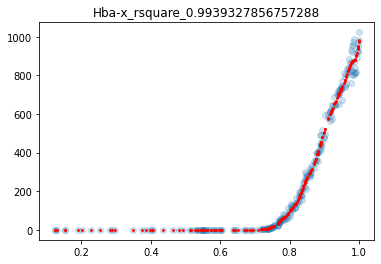

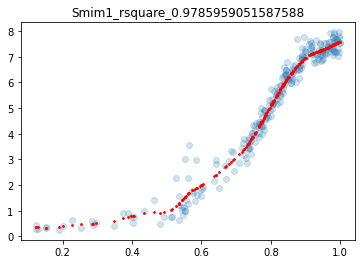

In [15]:
#gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
#gene_list_story=['Farp1','Gzmf','Bmp4']
gene_list_story=['Hba-x','Smim1']

for idx in range(len(gene_list_story)):
    gene_name=gene_list_story[idx]
    onerow=r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name==gene_name]
    plt.figure()
    plt.scatter(s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)].time,s0_merged_part_gene[s0_merged_part_time['index'].isin(sampled_idx)][gene_name],alpha=0.2)
    plt.scatter(s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)].time,onerow.combined.reset_index(drop=True)[0],c='red',s=3)
    plt.title(gene_name+'_rsquare_'+str(list(onerow.r_square)[0]))
    plt.show()

# sampled cell (no HP) cluster bar

In [16]:
ids = {
'Haematoendothelial progenitors':0,
'Blood progenitors 1':1,
'Blood progenitors 2':2,
'Erythroid1':3,
'Erythroid2':4,
'Erythroid3':5}

def get_dict(load_cellDancer,ids):
    onegene=load_cellDancer[load_cellDancer.gene_name==load_cellDancer.gene_name[0]]
    map_dict=dict(zip(onegene.cellIndex, onegene.clusters.map(ids)))
    return(map_dict)

map_dict=get_dict(load_cellDancer,ids)
map_dict

def map_cellid_to_cluster(map_dict,cellid):
    mapped=cellid.map(map_dict)
    mapped_df=pd.DataFrame({'cluster':mapped},index=cellid).T
    return(mapped_df)
mapped_df=map_cellid_to_cluster(map_dict,non_para_fit_heat.columns)
# mapped_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/downsampled_cluster_bar.csv')
mapped_df


index,82,4810,2091,6763,4735,4383,6626,272,6637,6542,...,11745,7449,4251,11937,3936,11780,4141,7691,3930,12093
cluster,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5


# filter rsquare by 0.8

In [17]:
r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].gene_name

187       Blvrb
741       Hba-x
742     Hbb-bh1
74         Alad
753       Hebp1
         ...   
613       Frmd8
1967      Zdbf2
1301      Prdm6
951      Lrrc58
290       Cdk12
Name: gene_name, Length: 1025, dtype: object

In [18]:
s0_merged_part_gene

,0610010F05Rik,1110038B12Rik,1500009L16Rik,1700017B05Rik,1700027J19Rik,1700037H04Rik,1810022K09Rik,1810026B05Rik,1810032O08Rik,2410003L11Rik,...,Zfpm1,Zmynd19,Zmynd8,Znrf1,Znrf3,Zrsr2,Zscan21,Zscan26,Zswim6,Zswim7
0,0.045757,0.755265,0.517064,0.227438,0.922967,0.382281,1.364491,0.187510,0.236766,0.009605,...,0.148109,0.694457,0.349836,0.704492,0.020616,1.399704,0.503637,0.056519,0.069720,0.368633
1,0.080250,0.741811,0.688037,0.258093,0.855593,0.423024,1.368414,0.220291,0.226738,0.006524,...,0.157351,0.786802,0.298789,0.643703,0.014003,1.342300,0.469649,0.051361,0.068521,0.480809
2,0.115107,0.668775,0.593461,0.263938,0.728814,0.425875,1.518204,0.281582,0.266112,0.005795,...,0.110479,0.847195,0.270915,0.567095,0.051119,1.375632,0.376475,0.049075,0.062892,0.412221
3,0.137819,0.639425,0.589416,0.284990,0.774082,0.430224,1.360984,0.271929,0.251287,0.005996,...,0.132182,0.908192,0.273795,0.491161,0.060487,1.269846,0.433855,0.041823,0.066696,0.386500
4,0.116552,0.688695,0.543766,0.254887,0.828682,0.450768,1.315259,0.244416,0.267378,0.006870,...,0.146318,0.789276,0.265576,0.680683,0.031064,1.391532,0.374823,0.052209,0.082408,0.363961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0.051791,0.427837,0.015751,0.049254,0.018468,1.062508,0.898295,0.082108,0.194437,0.011387,...,0.664185,0.313405,0.068925,0.131566,0.000000,0.193006,0.122173,0.000000,0.000000,0.237899
12325,0.047917,0.439269,0.046427,0.065170,0.000000,1.063562,0.975169,0.104583,0.181934,0.025429,...,0.620808,0.302924,0.100061,0.170091,0.005814,0.227903,0.149353,0.000000,0.000000,0.245249
12326,0.046612,0.396254,0.034097,0.081382,0.004997,1.117103,0.839070,0.061199,0.166920,0.018454,...,0.636390,0.299466,0.093487,0.105537,0.006916,0.200933,0.116318,0.000000,0.000000,0.232347
12327,0.058128,0.386269,0.036737,0.058216,0.014156,1.080593,0.909579,0.081570,0.168199,0.011480,...,0.611569,0.280441,0.086147,0.103024,0.006179,0.193190,0.132394,0.000000,0.000000,0.224996


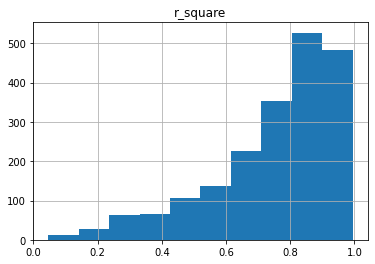

In [19]:
r_square_non_para_list_sort.hist('r_square')
r_square_non_para_list_sort=r_square_non_para_list_sort.reset_index(drop=True)
gene_list_story=['Hba-x','Smim1','Snca','Blvrb','Phc2','Skap1','Nfkb1','Myo1b','Sulf2','Yipf5','Coro2b','Mllt3','Smarca2','1500009L16Rik','Zmynd19','Abcg2','Adgrf5','Ccnb1','Epha5','Fam213a']
r_square_non_para_list_sort[r_square_non_para_list_sort.gene_name.isin(s0_merged_part_gene.columns)]
point_eight_rsquare_gene_name=r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].gene_name

non_para_fit_heat=pd.DataFrame(non_para_fit_list,index=s0_merged_part_gene.columns)
non_para_fit_heat_point_eight=non_para_fit_heat[non_para_fit_heat.index.isin(point_eight_rsquare_gene_name)]
non_para_fit_heat_point_eight.columns=s0_merged_part_time[s0_merged_part_time['index'].isin(sampled_idx)]['index']
#non_para_fit_heat_point_eight.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_fit_rsquare_0.8.heat_no_HP_cls.csv')
#r_square_non_para_list_sort[r_square_non_para_list_sort.r_square>0.8].to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rwquare_0.8.heat.csv')

In [20]:
non_para_fit_heat_point_eight_all_cell=s0_merged_part_gene[point_eight_rsquare_gene_name].T
#non_para_fit_heat_point_eight_all_cell.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/non_para_fit_rsquare_0.8.heat_all_cell.csv')
non_para_fit_heat_point_eight_all_cell

,0,1,2,3,4,5,6,7,8,9,...,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328
Blvrb,0.255312,0.221075,0.169796,0.180233,0.215238,0.206953,0.171017,0.218682,0.172789,0.170707,...,15.778971,15.666063,15.538877,16.526823,16.148640,15.995199,16.535450,16.379723,16.494297,0.297251
Hba-x,0.522280,0.489208,0.759194,0.556622,0.600863,0.531305,0.603713,0.552663,0.510155,0.412073,...,1023.169400,998.215200,977.052550,961.632900,989.528000,1004.166500,961.796260,988.840450,985.135400,0.029338
Hbb-bh1,1.225941,1.219282,1.596230,1.336233,1.227931,1.480964,1.338364,1.272103,1.217034,1.310457,...,1277.943600,1234.519900,1220.598900,1265.744300,1261.232500,1266.171400,1258.603000,1268.793200,1257.874400,0.431943
Alad,1.284337,1.344343,1.432221,1.393130,1.359084,1.435144,1.312302,1.350205,1.367690,1.444840,...,11.376315,11.711465,11.836102,11.350795,11.491257,11.526559,11.693607,11.635975,11.218060,1.242999
Hebp1,0.048055,0.026492,0.059375,0.040955,0.028803,0.057633,0.059906,0.044300,0.042541,0.051087,...,7.660205,7.566944,7.954022,7.837447,7.472093,7.937835,7.841999,7.844292,7.820807,0.070440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Frmd8,0.168163,0.132045,0.135766,0.109410,0.102224,0.083245,0.108958,0.143548,0.132683,0.145659,...,0.134305,0.143714,0.152846,0.136928,0.101275,0.170652,0.185164,0.158489,0.158744,0.122993
Zdbf2,0.156078,0.146752,0.165843,0.157198,0.153551,0.132759,0.202440,0.187904,0.169523,0.168808,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.207659
Prdm6,0.536019,0.525494,0.432648,0.510933,0.487803,0.501235,0.438857,0.461909,0.462267,0.445604,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.412107
Lrrc58,0.356319,0.362331,0.384334,0.426601,0.369320,0.445920,0.517105,0.394073,0.351309,0.470708,...,0.079862,0.072554,0.032569,0.068887,0.059662,0.064488,0.060105,0.031201,0.058682,0.293803


In [21]:
no_HP_rsquare_point_eight_heat_trend_line_morp_order=pd.read_table('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/kmeans_cluster_trend_line_0.8_10.gct',index_col=0)
no_HP_rsquare_point_eight_heat_trend_line_morp_order

,k_means_6,k_means_10,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,...,11745.00,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00
id,,,,,,,,,,,,,,,,,,,,,
Abhd16a,1.0,1.0,0.38,0.40,0.41,0.43,0.47,0.48,0.54,0.56,...,0.24,0.24,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23
Actl6a,2.0,1.0,3.91,3.90,3.89,3.88,3.88,3.88,3.90,3.90,...,1.62,1.61,1.56,1.56,1.53,1.51,1.50,1.49,1.48,1.47
Acvr2b,1.0,1.0,0.86,0.85,0.85,0.84,0.83,0.83,0.79,0.78,...,0.07,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.05
Adss,1.0,1.0,2.91,2.91,2.91,2.91,2.90,2.90,2.85,2.83,...,0.66,0.66,0.64,0.64,0.63,0.62,0.62,0.61,0.61,0.61
Ammecr1l,1.0,1.0,0.29,0.30,0.30,0.29,0.27,0.27,0.29,0.29,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tmem14c,3.0,10.0,3.20,3.20,3.22,3.26,3.44,3.46,3.74,3.82,...,28.41,28.42,28.46,28.47,28.48,28.50,28.50,28.51,28.52,28.52
Tmod1,3.0,10.0,0.00,0.00,0.01,0.01,0.01,0.02,0.01,0.02,...,0.97,0.97,0.99,0.99,1.00,1.00,1.00,1.01,1.01,1.01
Trim10,3.0,10.0,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,...,2.37,2.36,2.33,2.33,2.32,2.31,2.30,2.29,2.28,2.28


In [22]:
gene_sort=no_HP_rsquare_point_eight_heat_trend_line_morp_order.index

s0_heatmap_raw=load_cellDancer.pivot(index='cellIndex', columns='gene_name', values='s0')

s0_heatmap_raw=s0_heatmap_raw.T
s0_heatmap_raw

cellIndex,0,1,2,3,4,5,6,7,8,9,...,12319,12320,12321,12322,12323,12324,12325,12326,12327,12328
gene_name,,,,,,,,,,,,,,,,,,,,,
0610010F05Rik,0.312842,0.246910,0.168916,0.098369,0.116754,0.193911,0.255794,0.166934,0.092309,0.187102,...,0.051142,0.061666,0.040008,0.106277,0.065788,0.082322,0.039810,0.029527,0.028998,0.042932
1110038B12Rik,1.355268,1.420308,1.079459,1.904841,1.416954,1.224898,1.082312,0.954368,0.964514,1.359465,...,0.485764,0.640474,0.700184,1.317336,1.350453,0.551254,0.602661,0.742363,0.635604,0.758561
1500009L16Rik,0.622760,0.870611,0.638548,0.443685,0.486867,0.966799,1.115119,0.859408,0.643850,0.887406,...,0.067027,0.079232,0.053759,0.280404,0.325684,0.138677,0.042346,0.102660,0.070597,0.137588
1700017B05Rik,0.114831,0.060433,0.060933,0.137706,0.124115,0.150768,0.057764,0.139419,0.241332,0.105142,...,0.020730,0.092907,0.054964,0.164896,0.086774,0.121784,0.040416,0.089212,0.047425,0.188317
1700027J19Rik,0.721873,1.004247,1.007857,0.494196,0.599960,0.716323,0.833474,0.678904,0.725359,0.957638,...,0.005461,0.026175,0.009541,1.661138,0.123318,0.032495,0.024868,0.010656,0.006464,0.020039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zrsr2,0.936427,1.057224,0.837642,0.681012,0.695128,0.960495,0.885461,0.961065,1.105348,0.936473,...,0.208157,0.245828,0.194668,0.622178,0.543882,0.255452,0.204272,0.230350,0.236227,0.234467
Zscan21,0.185909,0.177920,0.166337,0.188783,0.151390,0.327564,0.172598,0.464385,0.417202,0.129500,...,0.144760,0.180347,0.126890,0.109089,0.141033,0.238511,0.171801,0.150204,0.091715,0.144220
Zscan26,0.020677,0.000000,0.011003,0.025781,0.000000,0.024406,0.026449,0.020705,0.025665,0.006099,...,0.009148,0.049160,0.003967,0.028578,0.037592,0.004707,0.004991,0.000000,0.013641,0.005487


In [23]:
cell_idx_no_HP=list(onegene[~(onegene.clusters=='Haematoendothelial progenitors')].cellIndex)

s0_heatmap_raw=s0_heatmap_raw[s0_merged_part_time[s0_merged_part_time['index'].isin(cell_idx_no_HP)]['index']]
s0_heatmap_raw['genename']=s0_heatmap_raw.index

no_HP_rsquare_point_eight_heat_trend_line_morp_order['genename']=no_HP_rsquare_point_eight_heat_trend_line_morp_order.index

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
no_HP_rsquare_point_eight_heat_trend_line_morp_order

,k_means_6,k_means_10,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,...,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00,genename
id,,,,,,,,,,,,,,,,,,,,,
Abhd16a,1.0,1.0,0.38,0.40,0.41,0.43,0.47,0.48,0.54,0.56,...,0.24,0.23,0.23,0.23,0.23,0.23,0.23,0.23,0.23,Abhd16a
Actl6a,2.0,1.0,3.91,3.90,3.89,3.88,3.88,3.88,3.90,3.90,...,1.61,1.56,1.56,1.53,1.51,1.50,1.49,1.48,1.47,Actl6a
Acvr2b,1.0,1.0,0.86,0.85,0.85,0.84,0.83,0.83,0.79,0.78,...,0.06,0.06,0.06,0.06,0.05,0.05,0.05,0.05,0.05,Acvr2b
Adss,1.0,1.0,2.91,2.91,2.91,2.91,2.90,2.90,2.85,2.83,...,0.66,0.64,0.64,0.63,0.62,0.62,0.61,0.61,0.61,Adss
Ammecr1l,1.0,1.0,0.29,0.30,0.30,0.29,0.27,0.27,0.29,0.29,...,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,Ammecr1l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tmem14c,3.0,10.0,3.20,3.20,3.22,3.26,3.44,3.46,3.74,3.82,...,28.42,28.46,28.47,28.48,28.50,28.50,28.51,28.52,28.52,Tmem14c
Tmod1,3.0,10.0,0.00,0.00,0.01,0.01,0.01,0.02,0.01,0.02,...,0.97,0.99,0.99,1.00,1.00,1.00,1.01,1.01,1.01,Tmod1
Trim10,3.0,10.0,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.01,...,2.36,2.33,2.33,2.32,2.31,2.30,2.29,2.28,2.28,Trim10


In [25]:
merged=pd.merge(no_HP_rsquare_point_eight_heat_trend_line_morp_order['genename'],s0_heatmap_raw,on='genename')
#merged.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_s0_sortByK10_rsquare_0.8.heat_no_HP.csv', index=False)
#s0_heatmap_raw.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_cluster2/point_eight_k_pearson_k6_trend_line_all_cell.csv',index=False)
merged

,genename,400,4802,6769,4543,4758,4421,4851,6610,6607,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
0,Abhd16a,0.412748,0.331164,0.290473,0.381085,0.359499,0.422851,0.277034,0.396213,0.317614,...,0.294592,0.202515,0.207560,0.243239,0.284812,0.247320,0.257767,0.270191,0.243669,0.211366
1,Actl6a,3.877499,4.087953,3.720115,4.179265,3.963922,3.860403,4.210298,3.925261,3.755981,...,1.509015,1.264778,1.336434,1.497797,1.412641,1.250936,1.320378,1.404000,1.332335,1.338036
2,Acvr2b,0.808786,0.750717,0.834348,0.764101,0.938699,0.910351,0.895283,0.835232,0.897377,...,0.057165,0.041104,0.023751,0.038855,0.041003,0.040701,0.030657,0.034704,0.040632,0.062221
3,Adss,2.901829,2.743523,2.205427,2.844265,2.699765,2.971019,2.692523,2.913272,2.455237,...,0.600645,0.552270,0.475239,0.628446,0.598506,0.580363,0.575916,0.648302,0.580709,0.559741
4,Ammecr1l,0.220746,0.310054,0.237129,0.330180,0.317690,0.286255,0.226035,0.320088,0.327121,...,0.099032,0.078465,0.101372,0.083780,0.102391,0.083741,0.093345,0.088655,0.090335,0.089452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Tmem14c,3.695666,3.169179,3.572033,3.005523,3.108299,3.116515,3.314383,3.209562,3.752554,...,28.031555,28.428867,28.451462,28.428474,28.009320,28.290705,28.514296,28.583807,28.822367,28.832900
1017,Tmod1,0.000000,0.000000,0.000000,0.003675,0.000000,0.000000,0.022694,0.000000,0.007884,...,1.060639,1.048686,0.811260,0.976028,1.063485,1.049461,0.956105,1.050819,0.996605,1.019575
1018,Trim10,0.004025,0.013750,0.000000,0.000000,0.017511,0.003888,0.027836,0.000000,0.021946,...,2.348661,2.295867,2.107942,2.194609,2.166462,2.275257,2.243190,2.295411,2.235307,2.248435
1019,Tspan33,0.347547,0.176020,0.115665,0.116071,0.302258,0.245856,0.264824,0.230212,0.250806,...,1.244604,1.222427,1.249040,1.353803,1.294013,1.261178,1.322758,1.243145,1.311663,1.313552


# get the cluster for no-NP cells

In [26]:
mapped_cluster_df_all_cell_no_HP=map_cellid_to_cluster(map_dict,merged.columns[1:])
# mapped_cluster_df_all_cell_no_HP.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/bar_non_para_s0_sortByK10_rsquare_0.8.heat_no_HP_mapped_cluster_df_all_cell_no_HP.csv')
mapped_cluster_df_all_cell_no_HP

,400,4802,6769,4543,4758,4421,4851,6610,6607,6793,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
cluster,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5


In [27]:
mapped_df

index,82,4810,2091,6763,4735,4383,6626,272,6637,6542,...,11745,7449,4251,11937,3936,11780,4141,7691,3930,12093
cluster,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5


## 1. reorder no_HP_rsquare_point_eight_heat_trend_line_morp_order

In [28]:
cluster_by_10=no_HP_rsquare_point_eight_heat_trend_line_morp_order

cluster_4=cluster_by_10[cluster_by_10.k_means_10==1]
cluster_8=cluster_by_10[cluster_by_10.k_means_10==2]
cluster_3=cluster_by_10[cluster_by_10.k_means_10==3]
cluster_1=cluster_by_10[cluster_by_10.k_means_10==4]
cluster_6=cluster_by_10[(cluster_by_10.k_means_10==5) | (cluster_by_10.k_means_10==7)]
cluster_5=cluster_by_10[cluster_by_10.k_means_10==6]
cluster_2=cluster_by_10[(cluster_by_10.k_means_10==8) | (cluster_by_10.k_means_10==9)]
cluster_7=cluster_by_10[cluster_by_10.k_means_10==10]

cluster_by_10_sort_list=[cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8]

cluster_by_10_sort=pd.DataFrame()
for enu,i in enumerate(cluster_by_10_sort_list):
    if enu==0:
        cluster_by_10_sort=i
    else:
        cluster_by_10_sort=cluster_by_10_sort.append(i)
    print(len(i))
cluster_by_10_sort.shape
#cluster_by_10.shape

150
97
254
249
118
54
47
52


(1021, 248)

## 1.1 output genename to do david

In [29]:
for enu,cluster in enumerate(cluster_by_10_sort_list):
    cluster.index
    pd.DataFrame(cluster.index).to_csv(('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_david/gene_in_cluster'+str(enu+1)+'.csv'),header=False,index=False)

## 1.2 bar_reorder_cluster_in_10

In [30]:
cluster_overall= np.array([])

for enu,i in enumerate(cluster_by_10_sort_list):
    cluster_num = np.array([enu+1])
    cluster_num_times=np.tile(cluster_num,len(i))
    cluster_overall=np.append(cluster_overall, cluster_num_times)
print(cluster_overall.shape)
cluster_overall_df=pd.DataFrame({'cluster_of_10':cluster_overall})
#cluster_overall_df.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/reorder_cluster_in_10/bar_reorder_cluster_in_10.csv')

(1021,)


In [31]:
cluster_overall_df

,cluster_of_10
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1016,8.0
1017,8.0
1018,8.0
1019,8.0


In [32]:
cluster_by_10_sort

,k_means_6,k_means_10,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,...,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00,genename
id,,,,,,,,,,,,,,,,,,,,,
3632451O06Rik,6.0,4.0,0.28,0.26,0.25,0.23,0.20,0.20,0.16,0.15,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3632451O06Rik
Ablim1,6.0,4.0,0.57,0.56,0.55,0.54,0.50,0.50,0.44,0.42,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Ablim1
Afdn,6.0,4.0,0.58,0.55,0.53,0.51,0.45,0.44,0.37,0.35,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,Afdn
Amot,6.0,4.0,0.42,0.43,0.43,0.44,0.43,0.43,0.39,0.38,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,Amot
Amotl1,6.0,4.0,0.11,0.10,0.11,0.11,0.10,0.10,0.07,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Amotl1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc2a1,4.0,2.0,2.46,2.51,2.49,2.41,2.10,2.08,2.07,2.02,...,3.27,3.26,3.26,3.25,3.24,3.24,3.23,3.23,3.23,Slc2a1
Slc4a1,4.0,2.0,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,...,2.26,2.31,2.31,2.34,2.35,2.37,2.38,2.39,2.39,Slc4a1
St3gal6,4.0,2.0,0.26,0.25,0.25,0.24,0.21,0.21,0.17,0.16,...,0.72,0.74,0.74,0.75,0.76,0.77,0.77,0.78,0.78,St3gal6


In [33]:
reorder_k_10=cluster_by_10_sort[cluster_by_10_sort.columns[2:-1]]
#reorder_k_10.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/kmeans_cluster_trend_line_0.8_10_reorder.csv')
reorder_k_10

,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,1211.00,10262.00,...,11745.00,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00
id,,,,,,,,,,,,,,,,,,,,,
3632451O06Rik,0.28,0.26,0.25,0.23,0.20,0.20,0.16,0.15,0.12,0.11,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ablim1,0.57,0.56,0.55,0.54,0.50,0.50,0.44,0.42,0.36,0.34,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Afdn,0.58,0.55,0.53,0.51,0.45,0.44,0.37,0.35,0.29,0.28,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
Amot,0.42,0.43,0.43,0.44,0.43,0.43,0.39,0.38,0.35,0.34,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
Amotl1,0.11,0.10,0.11,0.11,0.10,0.10,0.07,0.06,0.09,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc2a1,2.46,2.51,2.49,2.41,2.10,2.08,2.07,2.02,1.94,1.93,...,3.27,3.27,3.26,3.26,3.25,3.24,3.24,3.23,3.23,3.23
Slc4a1,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,...,2.24,2.26,2.31,2.31,2.34,2.35,2.37,2.38,2.39,2.39
St3gal6,0.26,0.25,0.25,0.24,0.21,0.21,0.17,0.16,0.16,0.17,...,0.71,0.72,0.74,0.74,0.75,0.76,0.77,0.77,0.78,0.78


# 2.match the reordered rank of gene with allcells heatmap

In [34]:
s0_heatmap_raw # this should bee kept since the cells are already ordered by time

cellIndex,400,4802,6769,4543,4758,4421,4851,6610,6607,6793,...,3930,11886,7982,11435,11122,3784,11473,11604,12093,genename
gene_name,,,,,,,,,,,,,,,,,,,,,
0610010F05Rik,0.155570,0.194810,0.132937,0.199482,0.179454,0.207584,0.223742,0.195962,0.161354,0.115241,...,0.044262,0.029431,0.050349,0.054333,0.055289,0.051791,0.047917,0.046612,0.058128,0610010F05Rik
1110038B12Rik,1.107686,1.187867,1.225331,1.176802,1.015425,1.288435,1.318333,1.380350,1.277662,1.271566,...,0.403637,0.461725,0.457142,0.434558,0.447485,0.427837,0.439269,0.396254,0.386269,1110038B12Rik
1500009L16Rik,1.017211,1.055389,0.927264,0.982797,1.037973,1.194845,1.022657,0.959702,1.146745,0.829605,...,0.034380,0.026434,0.030603,0.059106,0.041182,0.015751,0.046427,0.034097,0.036737,1500009L16Rik
1700017B05Rik,0.209772,0.149293,0.268845,0.165438,0.201807,0.215851,0.140685,0.153807,0.200860,0.219595,...,0.062164,0.027988,0.056373,0.053646,0.039584,0.049254,0.065170,0.081382,0.058216,1700017B05Rik
1700027J19Rik,0.621100,0.571700,0.687210,0.687712,0.481906,0.610636,0.630328,0.602872,0.658489,0.682819,...,0.000000,0.000000,0.000000,0.031534,0.029881,0.018468,0.000000,0.004997,0.014156,1700027J19Rik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zrsr2,0.718664,0.901558,0.957862,1.025478,0.984380,0.804070,0.932721,0.829299,0.832335,0.746123,...,0.193013,0.176189,0.191772,0.230593,0.209804,0.193006,0.227903,0.200933,0.193190,Zrsr2
Zscan21,0.264112,0.324044,0.409851,0.309417,0.256726,0.222831,0.260088,0.260965,0.301683,0.265838,...,0.123622,0.131430,0.129134,0.103691,0.113425,0.122173,0.149353,0.116318,0.132394,Zscan21
Zscan26,0.016154,0.000000,0.012263,0.025162,0.008473,0.009825,0.043197,0.000000,0.028231,0.024003,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Zscan26


In [35]:
reorder_k_10_rank=reorder_k_10
reorder_k_10_rank['genename']=reorder_k_10_rank.index

/Users/guangyuwang/opt/anaconda3/envs/celldancer/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
reorder_k_10

,4810.00,477.00,4613.00,4735.00,6884.00,4811.00,9641.00,464.00,1211.00,10262.00,...,4168.00,4278.00,11726.00,3922.00,3818.00,12125.00,3930.00,11604.00,12093.00,genename
id,,,,,,,,,,,,,,,,,,,,,
3632451O06Rik,0.28,0.26,0.25,0.23,0.20,0.20,0.16,0.15,0.12,0.11,...,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3632451O06Rik
Ablim1,0.57,0.56,0.55,0.54,0.50,0.50,0.44,0.42,0.36,0.34,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Ablim1
Afdn,0.58,0.55,0.53,0.51,0.45,0.44,0.37,0.35,0.29,0.28,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,Afdn
Amot,0.42,0.43,0.43,0.44,0.43,0.43,0.39,0.38,0.35,0.34,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,Amot
Amotl1,0.11,0.10,0.11,0.11,0.10,0.10,0.07,0.06,0.09,0.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Amotl1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Slc2a1,2.46,2.51,2.49,2.41,2.10,2.08,2.07,2.02,1.94,1.93,...,3.27,3.26,3.26,3.25,3.24,3.24,3.23,3.23,3.23,Slc2a1
Slc4a1,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,...,2.26,2.31,2.31,2.34,2.35,2.37,2.38,2.39,2.39,Slc4a1
St3gal6,0.26,0.25,0.25,0.24,0.21,0.21,0.17,0.16,0.16,0.17,...,0.72,0.74,0.74,0.75,0.76,0.77,0.77,0.78,0.78,St3gal6


In [37]:
merged_reordered=pd.merge(reorder_k_10_rank['genename'],s0_heatmap_raw,on='genename')
#merged_reordered.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/non_para_s0_sortByK10_reordered_rsquare_0.8.heat_no_HP.csv', index=False)
merged_reordered

,genename,400,4802,6769,4543,4758,4421,4851,6610,6607,...,11751,3930,11886,7982,11435,11122,3784,11473,11604,12093
0,3632451O06Rik,0.460269,0.547714,0.662784,0.639182,0.412890,0.446849,0.289543,0.430582,0.507381,...,0.000000,0.005267,0.006137,0.000000,0.000000,0.005817,0.005438,0.000000,0.006137,0.005483
1,Ablim1,0.437539,0.508333,0.401953,0.441548,0.343543,0.506206,0.420132,0.525218,0.462310,...,0.005374,0.000000,0.000000,0.005982,0.000000,0.005982,0.005593,0.000000,0.006311,0.005639
2,Afdn,0.611458,0.799459,0.818547,0.755192,0.620240,0.640561,0.659508,0.618888,0.810864,...,0.033580,0.039988,0.040968,0.028470,0.028845,0.038565,0.026054,0.015338,0.040766,0.036220
3,Amot,0.524645,0.658351,0.706745,0.557881,0.562654,0.375068,0.693639,0.402397,0.541343,...,0.077565,0.034457,0.037778,0.069454,0.039320,0.062338,0.036555,0.029549,0.046606,0.048261
4,Amotl1,0.139043,0.115425,0.120398,0.145072,0.144823,0.147142,0.159108,0.142506,0.108683,...,0.006186,0.000000,0.000000,0.000000,0.007198,0.000000,0.000000,0.007400,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Slc2a1,3.109274,3.799754,2.051065,4.132637,2.862501,2.367092,3.181409,2.866214,1.937506,...,2.907154,3.270218,3.218147,2.906249,2.846812,3.151318,3.278560,2.679825,3.266719,3.203581
1017,Slc4a1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.349594,2.367683,2.449108,2.437371,2.315186,2.435062,2.409855,2.381743,2.396260,2.365552
1018,St3gal6,0.248666,0.381527,0.370505,0.440260,0.345515,0.347577,0.315643,0.406563,0.291613,...,0.831471,0.783010,0.828622,0.794507,0.808420,0.874255,0.842958,0.765535,0.786967,0.773444
1019,Trib3,0.031698,0.022889,0.052227,0.069960,0.009426,0.066103,0.056396,0.069363,0.066748,...,0.474838,0.465986,0.444100,0.421803,0.361087,0.468976,0.438626,0.403913,0.427566,0.386662


# Pseudotime bar for heatmap

In [38]:
s0_merged_part_time_noHP=s0_merged_part_time[s0_merged_part_time['index'].isin(cell_idx_no_HP)].T
s0_merged_part_time_noHP_bar=s0_merged_part_time_noHP[s0_merged_part_time_noHP.index=='time']
s0_merged_part_time_noHP_bar.columns=s0_merged_part_time_noHP.loc['index']
#s0_merged_part_time_noHP_bar.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/pseudotime/radis/rsquare_point_eight_not_seperate_no_HP_cls/bar_pseudotime_noHP_allcell.csv')

s0_merged_part_time_noHP_bar

index,400.0,4802.0,6769.0,4543.0,4758.0,4421.0,4851.0,6610.0,6607.0,6793.0,...,11751.0,3930.0,11886.0,7982.0,11435.0,11122.0,3784.0,11473.0,11604.0,12093.0
time,0.090547,0.093773,0.097471,0.097574,0.098463,0.099639,0.10223,0.103089,0.107485,0.108458,...,0.998978,0.99908,0.99924,0.999263,0.999279,0.999351,0.999367,0.999785,0.999789,0.999826


# Amount of each cluster

In [39]:
cluster_list = [
'Haematoendothelial progenitors',
'Blood progenitors 1',
'Blood progenitors 2',
'Erythroid1',
'Erythroid2',
'Erythroid3']
for i in range(6):
    print(cluster_list[i]+": "+str(len(onegene[onegene.clusters==cluster_list[i]])))

Haematoendothelial progenitors: 2514
Blood progenitors 1: 623
Blood progenitors 2: 2460
Erythroid1: 2929
Erythroid2: 1106
Erythroid3: 2697
0.9475129177920063
0.5438388026031805
0.6990554934459201
0.889686668410346
0.9069923398245071
0.9727263404447991
0.984509653670078
0.6514956232677371
0.2903790813605101
0.5969066094570536
0.937858962910143
0.635452584484444
0.7975201811311025
0.9377189430298986
0.8611689293880159
0.7356943766682621
0.5549004978493556
0.8896515024089328
0.7146095519299887
0.732173350951489
0.9824548598805234
0.7345465679574428
0.9046089128468351
0.7483068882098602
0.816633590898689
0.9317212927493101
0.5345761625367973
0.8179548275530067
0.7003065197050686
0.874483190371012
0.918249696828655
0.9627910679423811
0.7836379089288352
0.8350369272967224
0.4786239513136867
0.39482931429863033
0.8149452168525214
0.7773921839592844
0.8032655580555477
0.33551488102353483
0.8863976580502854
0.892351146633137
0.6628062150129891
0.657294721011322
0.9947335879565422
0.442955801967